# SMS spam detection with various classification techniques

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

random_num = 7

In [3]:
df = pd.read_csv('../input/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# clean data frame
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)
df = df.rename(columns = {'v1':'label','v2':'message'})
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# check out the data
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
# create new feature "message length" and visualize it
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


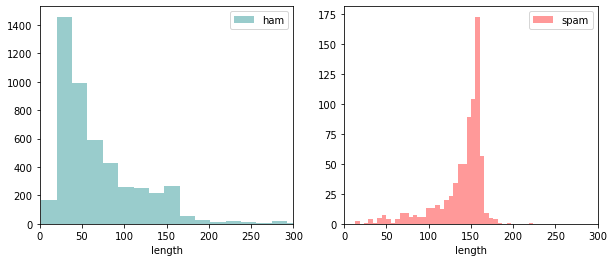

In [12]:
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
plt.xlim(0, 300)
sns.distplot(df.length[df.label=='ham'], color='teal', label='ham', kde=False, ax=axes[0]);
sns.distplot(df.length[df.label=='spam'], color='red', label='spam', kde=False, ax=axes[1]);
axes[0].legend();
axes[1].legend();

Spam messages are on average more lengthy.

In [13]:
# function to pre-process of the messages, remove any punctuation and stopwords
def text_preprocess(text):    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]    
    return " ".join(text)

In [14]:
text_raw = df['message'].copy()
text_cleaned = text_raw.apply(text_preprocess)

In [17]:
#vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer
features = vectorizer.fit_transform(text_cleaned)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, df['label'], test_size=0.3, random_state=random_num)

import a range of classifiers and run through

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
nbc = MultinomialNB(alpha=0.2)
rfc = RandomForestClassifier(n_estimators=31, random_state=random_num)

Parametres are based on notebook:
[Spam detection Classifiers hyperparameter tuning][1]


  [1]: https://www.kaggle.com/muzzzdy/d/uciml/sms-spam-collection-dataset/spam-detection-classifiers-hyperparameter-tuning/

In [49]:
clfs = {'LogisticRegression':lrc, 'SVC':svc, 'KNeighbour': knc, 'NaiveBayes': nbc, 'RandomForest': rfc}

Let's make functions to fit our classifiers and make predictions

In [42]:
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

In [43]:
def predict_labels(clf, X_test):
    return (clf.predict(X_test))

Now iterate through classifiers and save the results

In [59]:
pred_scores = []
for clf_name, clf in clfs.items():
    train_classifier(clf, X_train, y_train)
    pred = predict_labels(clf,X_test)
    pred_scores.append((clf_name, accuracy_score(y_test,pred)))

In [60]:
df_score = pd.DataFrame(pred_scores, columns = ['Clf_Name','Score'])
df_score

,Clf_Name,Score
0,LogisticRegression,0.941388
1,SVC,0.972488
2,KNeighbour,0.923445
3,NaiveBayes,0.979665
4,RandomForest,0.955742


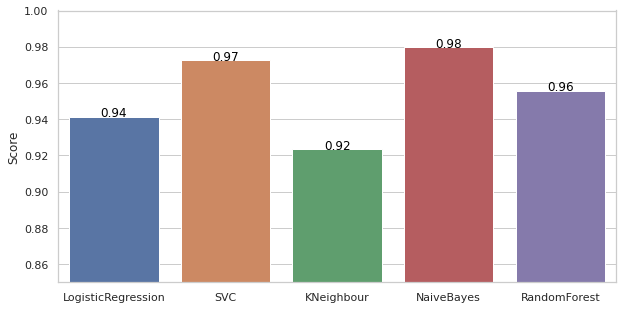

In [83]:
plt.figure(figsize=[10,5])
ax = sns.barplot(x="Clf_Name", y="Score", data=df_score);
for index, row in df_score.iterrows():
    ax.text(row.name,row.Score, round(row.Score,2), color='black', ha="center")
ax.set_ylim(0.85,1)
plt.xlabel('');

NaiveBayes is your friend in spam detection.